In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import numpy as np

In [2]:
response=requests.get("https://www.sofascore.com/football/match/real-madrid-olympique-de-marseille/QHsEgb#id:14566597,tab:statistics")

In [3]:
response.status_code

200

In [4]:
soup=BeautifulSoup(response.text,"html.parser")

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
response.status_code

200

In [7]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/real-madrid-olympique-de-marseille/QHsEgb',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = 'https://www.sofascore.com/api/v1/event/14566597/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [8]:
shots=response.json()

In [9]:
df=pd.json_normalize(shots["shotmap"])

In [10]:
df

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,addedTime,...,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y,goalType,player.firstName,player.lastName
0,False,miss,corner,head,high,0.023319,0.000000,5678466,90,6.0,...,46.7,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,miss,corner,left-foot,high,0.057515,0.000000,5678463,90,2.0,...,48.9,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,miss,corner,left-foot,right,0.026976,0.000000,5678454,89,NaN,...,65.2,86.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,miss,assisted,right-foot,high-right,0.073033,0.000000,5678450,87,NaN,...,59.0,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,save,assisted,left-foot,low-right,0.035386,0.056996,5678444,86,NaN,...,52.3,84.2,1.5,53.2,0.0,53.2,1.5,NaN,NaN,NaN
5,True,save,assisted,right-foot,low-centre,0.121364,0.185478,5678416,85,NaN,...,50.1,87.3,1.5,47.7,0.0,47.7,1.5,NaN,NaN,NaN
6,True,goal,penalty,right-foot,low-left,0.788400,0.748004,5678406,81,NaN,...,45.9,93.7,NaN,NaN,NaN,NaN,NaN,penalty,NaN,NaN
7,True,block,assisted,right-foot,low-centre,0.111558,0.000000,5678402,79,NaN,...,48.4,81.0,7.5,37.2,0.0,37.2,7.5,NaN,NaN,NaN
8,True,save,assisted,right-foot,high-centre,0.043965,0.039194,5678399,79,NaN,...,49.1,79.1,1.5,47.1,0.0,47.1,1.5,NaN,NaN,NaN
9,True,miss,assisted,right-foot,left,0.065698,0.000000,5678349,76,NaN,...,29.7,68.1,3.8,35.7,0.0,35.7,3.8,NaN,NaN,NaN


In [11]:
df.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'xg', 'xgot', 'id', 'time', 'addedTime', 'timeSeconds',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'periodTimeSeconds',
       'incidentType', 'player.name', 'player.slug', 'player.shortName',
       'player.position', 'player.jerseyNumber', 'player.userCount',
       'player.sofascoreId', 'player.id',
       'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.bn',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'draw.start.x', 'draw.start.y', 'draw.end.x',
       'draw.end.y', 'draw.goal.x', 'draw.goal

In [12]:
df=df[["isHome","shotType","xg","xgot","time","player.shortName","playerCoordinates.x","playerCoordinates.y","goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [13]:
df

,isHome,shotType,xg,xgot,time,player.shortName,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,miss,0.023319,0.000000,90,L. Balerdi,9.5,43.4,0,53.3
1,False,miss,0.057515,0.000000,90,M. Greenwood,5.7,61.3,0,51.1
2,False,miss,0.026976,0.000000,89,M. Greenwood,10.8,63.0,0,34.8
3,False,miss,0.073033,0.000000,87,I. Paixão,12.0,37.4,0,41.0
4,False,save,0.035386,0.056996,86,M. Greenwood,12.8,65.2,0,47.7
5,True,save,0.121364,0.185478,85,B. Díaz,13.3,37.6,0,49.9
6,True,goal,0.788400,0.748004,81,K. Mbappé,11.5,50.0,0,54.1
7,True,block,0.111558,0.000000,79,Vinícius Jr.,8.8,35.2,0,51.6
8,True,save,0.043965,0.039194,79,Vinícius Jr.,12.0,32.7,0,50.9
9,True,miss,0.065698,0.000000,76,K. Mbappé,18.1,48.3,0,70.3


In [14]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_5224\1037772248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_5224\1037772248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_5224\1037772248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==False):
        df["playerCoordinates.y"]=80-df["playerCoordinates.y"]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_5224\2899737304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.y"]=80-df["playerCoordinates.y"]


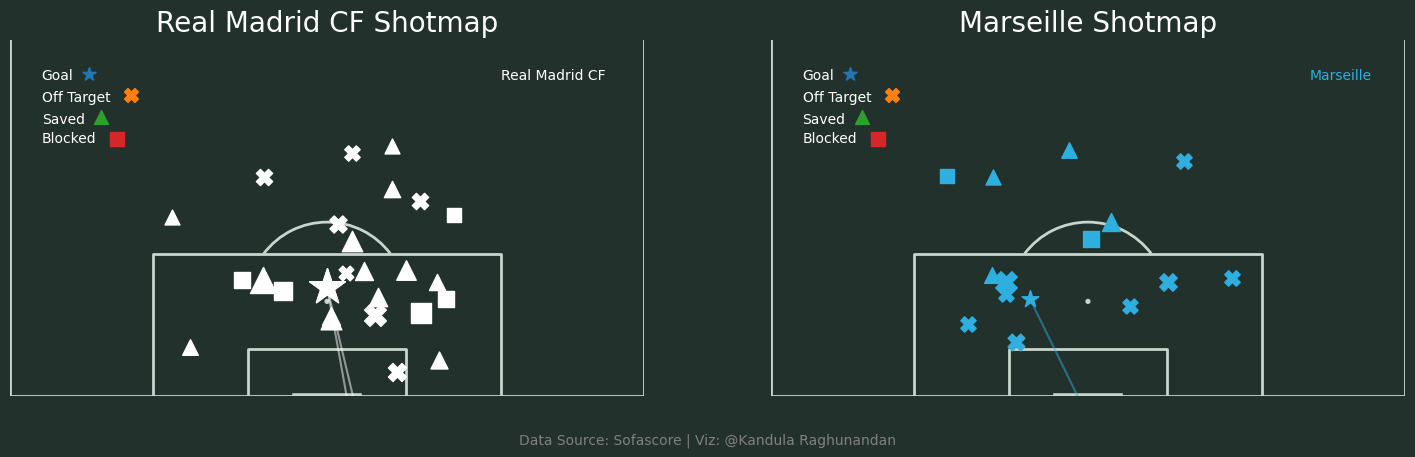

In [32]:
fig, ax= plt.subplots(1,2,figsize=(18,12))
fig.set_facecolor("#22312b")
ax[0].patch.set_facecolor("#22312b")
ax[1].patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half=True)
pitch.draw(ax=ax[0], constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax[1], constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

ax[0].set_xlim(0,80)
ax[0].set_ylim(0,45)
ax[1].set_xlim(0,80)
ax[1].set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            ax[0].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="^")
        if df["shotType"][x]=="miss":
            ax[0].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            ax[0].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            ax[0].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="*")
            ax[0].plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#FFFFFF",alpha=0.5)
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            ax[1].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#2FAEE0",s=df["xg"][x]*800+100,marker="^")
        if df["shotType"][x]=="miss":
            ax[1].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#2FAEE0",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            ax[1].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#2FAEE0",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            ax[1].scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#2FAEE0",s=df["xg"][x]*800+100,marker="*")
            ax[1].plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#2FAEE0",alpha=0.5)

ax[0].set_title("Real Madrid CF Shotmap",color="white",size="20")
ax[0].text(4,40,"Goal",c="white")
ax[0].scatter(10,40.75,marker="*",s=100)
ax[0].text(4,37.25,"Off Target",color="white")
ax[0].scatter(15.25,38,marker="X",s=100)
ax[0].text(4,34.5,"Saved",color="white")
ax[0].scatter(11.5,35.25,marker="^",s=100)
ax[0].text(4,32,"Blocked",color="white")
ax[0].scatter(13.5,32.5,marker="s",s=100)

ax[1].set_title("Marseille Shotmap",color="white",size="20")
ax[1].text(4,40,"Goal",c="white")
ax[1].scatter(10,40.75,marker="*",s=100)
ax[1].text(4,37.25,"Off Target",color="white")
ax[1].scatter(15.25,38,marker="X",s=100)
ax[1].text(4,34.5,"Saved",color="white")
ax[1].scatter(11.5,35.25,marker="^",s=100)
ax[1].text(4,32,"Blocked",color="white")
ax[1].scatter(13.5,32.5,marker="s",s=100)

ax[1].text(68,40,"Marseille",c="#2FAEE0")
ax[0].text(62,40,"Real Madrid CF",c="#FFFFFF")

bbox1 = ax[0].get_position()
bbox2 = ax[1].get_position()

x_mid = (bbox1.x0 + bbox2.x1) / 2

y_pos = min(bbox1.y0, bbox2.y0) - 0.03  # adjust -0.03 if too close/far

fig.text(
    x_mid, y_pos,
    "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="top",
    fontsize=10, color="gray"
)


plt.savefig("C:/Users/K Raghunandan/Analyst/Results/RealMadrid_vs_Marseille_2025.png")

In [17]:
df=df.sort_values("time").reset_index()
df

,index,isHome,shotType,xg,xgot,time,player.shortName,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,42,True,miss,0.181525,0.000000,2,K. Mbappé,10.32,46.00,0.0,33.36
1,41,True,post,0.193486,0.000000,6,F. Mastantuono,4.20,28.16,0.0,35.76
2,40,True,save,0.061395,0.079280,8,Rodrygo,4.56,54.16,0.0,39.76
3,38,True,save,0.093102,0.343413,10,K. Mbappé,12.60,46.48,0.0,41.28
4,39,True,save,0.046694,0.090190,10,Rodrygo,26.16,48.24,0.0,41.84
5,36,False,block,0.010898,0.000000,11,M. Greenwood,27.84,22.24,0.0,38.16
6,37,True,save,0.086552,0.406028,11,D. Huijsen,10.20,40.56,0.0,42.00
7,35,True,miss,0.045091,0.000000,13,F. Mastantuono,27.72,32.08,0.0,50.32
8,34,False,miss,0.029558,0.000000,14,T. Weah,15.00,58.16,0.0,35.76
9,33,True,save,0.084045,0.067209,15,A. Güler,15.84,44.64,0.0,40.56


In [18]:
a_xG=[0]
h_xG=[0]
a_min=[0]
h_min=[0]

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        h_xG.append(df["xg"][x])
        h_min.append(df["time"][x])
    if (df["isHome"][x]==False):
        a_xG.append(df["xg"][x])
        a_min.append(df["time"][x])

In [19]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum=nums_cumulative_sum(a_xG)
h_cum=nums_cumulative_sum(h_xG)

In [20]:
a_cum

[0,
 np.float64(0.010898137465119),
 np.float64(0.040456494316458),
 np.float64(0.117691321298479),
 np.float64(0.14748535118997),
 np.float64(0.193155972287058),
 np.float64(0.22192552499473),
 np.float64(0.39889362268149997),
 np.float64(0.42154815979302096),
 np.float64(0.5070459190756099),
 np.float64(0.5343074761331099),
 np.float64(0.5696933604776879),
 np.float64(0.6427260078489799),
 np.float64(0.6697022579610369),
 np.float64(0.6930208820849679),
 np.float64(0.7505354415625359)]

In [21]:
h_cum

[0,
 np.float64(0.18152521550655),
 np.float64(0.37501087784766995),
 np.float64(0.43640589341521097),
 np.float64(0.529507558792828),
 np.float64(0.576201882213353),
 np.float64(0.662754375487565),
 np.float64(0.707844886928796),
 np.float64(0.791889909654855),
 np.float64(0.8252654485404479),
 np.float64(1.613665448540448),
 np.float64(1.766518043392898),
 np.float64(1.813305312806369),
 np.float64(1.83183492537737),
 np.float64(1.875775175207854),
 np.float64(2.019983680957554),
 np.float64(2.0466872696220864),
 np.float64(2.0869964082181442),
 np.float64(2.399899633640054),
 np.float64(2.413318599613014),
 np.float64(2.5034809811428222),
 np.float64(2.5224319687500634),
 np.float64(2.6083525484815273),
 np.float64(2.6229390958711543),
 np.float64(2.6886371532842555),
 np.float64(2.8001955533787655),
 np.float64(2.8441602969929622),
 np.float64(3.6325602969929625),
 np.float64(3.7539239591762423)]

In [22]:
a_total=round(a_cum[-1],2)
h_total=round(h_cum[-1],2)

Text(0.5, 1.0, 'Real Madrid vs Marseille xG Flow Chart')

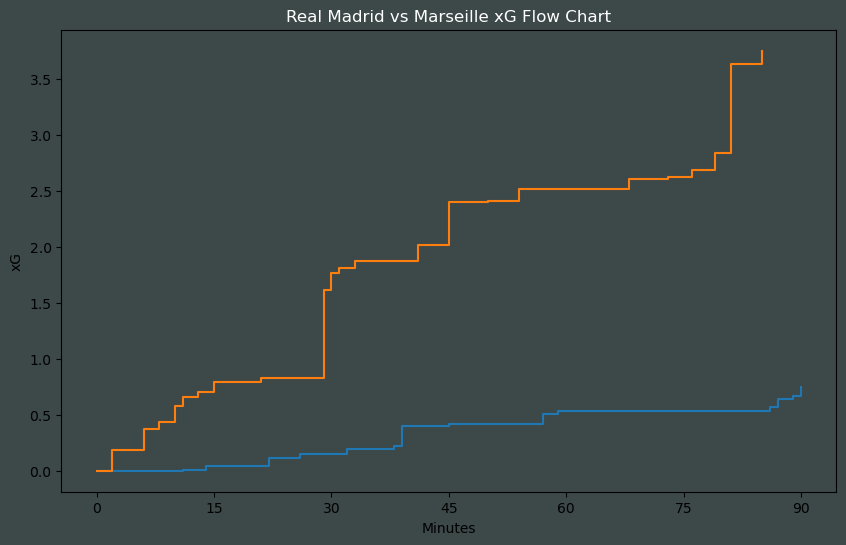

In [23]:
fig,ax=plt.subplots(figsize=(10,6))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minutes")
plt.ylabel("xG")

ax.step(x=a_min,y=a_cum,where="post")
ax.step(x=h_min,y=h_cum,where="post")

plt.title("Real Madrid vs Marseille xG Flow Chart",color="white")